# pH4.6 4NPQ MD RMSD Plotting with mdtraj and Pandas DataFrame 

In [11]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd

In [12]:
residue_selection = "not (resid 622 or resid 623 or resid 624 or resid 933 or resid 934 or resid 935 or resid 1244 or resid 1245 or resid 1246 or resid 0 or resid 1 or resid 2 or resid 311 or resid 312 or resid 313)"

In [13]:
location = '/media/scottzhuang/data/MD/4NPQ_ph46_md1/'

In [23]:
def rmsd_ecd_dataframe(traj_name, ref_name):
    traj_location = location + traj_name + '/mdrun/4NPQ_ph46_' + traj_name + '_md.skip1.ca.xtc' 
    top_location = location + traj_name + '/mdrun/4NPQ_ph46_' + traj_name + '_md.ca.gro' 
    if ref_name == 'self':
        ref_location = location + traj_name + '/mdrun/4NPQ_ph46_' + traj_name + '_md.ca.gro'
    else:
        ref_location = '/media/scottzhuang/data/MD/pdb_ensemble/' + ref_name + '_1.mer.pdb'
    traj = md.load(traj_location,top=top_location)
    ref = md.load(ref_location)
    topology = traj.topology
    if traj.n_atoms != ref.n_atoms:
        traj = traj.atom_slice(topology.select(residue_selection))
    traj = traj.atom_slice(topology.select("resid 0 to 197 or resid 311 to 508 or resid 622 to 819 or resid 933 to 1130 or resid 1244 to 1441"))
    ref = ref.atom_slice(topology.select("resid 0 to 197 or resid 311 to 508 or resid 622 to 819 or resid 933 to 1130 or resid 1244 to 1441"))
    traj.superpose(ref)
    rmsd_data = pd.DataFrame({'RMSD':md.rmsd(traj, ref)*10,'time':traj.time/1000})
    return rmsd_data

In [25]:
def rmsd_tmd_dataframe(traj_name, ref_name):
    traj_location = location + traj_name + '/mdrun/4NPQ_ph46_' + traj_name + '_md.skip1.ca.xtc' 
    top_location = location + traj_name + '/mdrun/4NPQ_ph46_' + traj_name + '_md.ca.gro' 
    if ref_name == 'self':
        ref_location = location + traj_name + '/mdrun/4NPQ_ph46_' + traj_name + '_md.ca.gro'
    else:
        ref_location = '/media/scottzhuang/data/MD/pdb_ensemble/' + ref_name + '_1.mer.pdb'
    traj = md.load(traj_location,top=top_location)
    ref = md.load(ref_location)
    topology = traj.topology
    if traj.n_atoms != ref.n_atoms:
        traj = traj.atom_slice(topology.select(residue_selection))
    traj = traj.atom_slice(topology.select("not (resid 0 to 197 or resid 311 to 508 or resid 622 to 819 or resid 933 to 1130 or resid 1244 to 1441)"))
    ref = ref.atom_slice(topology.select("not (resid 0 to 197 or resid 311 to 508 or resid 622 to 819 or resid 933 to 1130 or resid 1244 to 1441)"))
    traj.superpose(ref)
    rmsd_data = pd.DataFrame({'RMSD':md.rmsd(traj, ref)*10,'time':traj.time/1000})
    return rmsd_data

In [26]:
def rmsd_dataframe(traj_name, ref_name):
    traj_location = location + traj_name + '/mdrun/4NPQ_ph46_' + traj_name + '_md.skip1.ca.xtc' 
    top_location = location + traj_name + '/mdrun/4NPQ_ph46_' + traj_name + '_md.ca.gro' 
    if ref_name == 'self':
        ref_location = location + traj_name + '/mdrun/4NPQ_ph46_' + traj_name + '_md.ca.gro'
    else:
        ref_location = '/media/scottzhuang/data/MD/pdb_ensemble/' + ref_name + '_1.mer.pdb'
    traj = md.load(traj_location,top=top_location)
    ref = md.load(ref_location)
    topology = traj.topology
    if traj.n_atoms != ref.n_atoms:
        traj = traj.atom_slice(topology.select(residue_selection))
    traj.superpose(ref)
    rmsd_data = pd.DataFrame({'RMSD':md.rmsd(traj, ref)*10,'time':traj.time/1000})
    return rmsd_data

In [70]:
def plotrmsd(rmsd2,rmsd3,rmsd4,note):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    rmsd2.plot(x='time', y='RMSD', ax=axes[0,0],legend=False)
    rmsd3.plot(x='time', y='RMSD', ax=axes[0,0],legend=False)
    rmsd4.plot(x='time', y='RMSD', ax=axes[0,0],legend=False)
    #axes[0,0].legend(['F238L','I233T','I233TF238L'])
    #axes[0,0].set_ylim(0,10)

    rmsd2.plot(x='time', y='RMSD', ax=axes[0,1],legend=False,title="F238L")
    rmsd3.plot(x='time', y='RMSD', ax=axes[1,0],legend=False,title="I233T")
    rmsd4.plot(x='time', y='RMSD', ax=axes[1,1],legend=False,title="F238LI233T")
    fig.suptitle('ph4.6 ' + note)
    fig.tight_layout()

In [53]:
def plotrmsdhist(rmsd2,rmsd3,rmsd4,note):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    rmsd2.plot.hist(x='time',bins=100,ax=axes[0,0],legend=False)
    rmsd3.plot.hist(x='time',bins=100,ax=axes[0,0],legend=False)
    rmsd4.plot.hist(x='time',bins=100,ax=axes[0,0],legend=False)
    #axes[0,0].legend(['F238L','I233T','I233TF238L'])
    rmsd2.plot.hist(x='time',bins=100,ax=axes[0,1],legend=False,title="F238L")
    rmsd3.plot.hist(x='time',bins=100,ax=axes[1,0],legend=False,title="I233T")
    rmsd4.plot.hist(x='time',bins=100,ax=axes[1,1],legend=False,title="F238LI233T")
    fig.suptitle('ph4.6 ' + note)
    fig.tight_layout()

In [9]:
def plotrmsdall(rmsd1,rmsd2,rmsd3,rmsd4,note):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    rmsd1.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
    rmsd2.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
    rmsd3.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
    rmsd4.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
    axes.legend(['WT', 'F238L','I233T','I233TF238L'])
    fig.suptitle('MD1 ' + note)

In [10]:
def plotrmsdhistall(rmsd1,rmsd2,rmsd3,rmsd4,note):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    rmsd1.plot.hist(x='time',bins=100,ax=axes,alpha=0.7)
    rmsd2.plot.hist(x='time',bins=100,ax=axes,alpha=0.7)
    rmsd3.plot.hist(x='time',bins=100,ax=axes,alpha=0.7)
    rmsd4.plot.hist(x='time',bins=100,ax=axes,alpha=0.7)
    axes.legend(['WT', 'F238L','I233T','I233TF238L'])
    fig.suptitle('MD1 ' + note)

## Ref: First Frame of each MD ensemble (CA, 1555 atoms)

In [32]:
rmsd_4NPQ_F238L = rmsd_dataframe("F238L","self")
rmsd_4NPQ_I233T = rmsd_dataframe("I233T","self")
rmsd_4NPQ_F238LI233T = rmsd_dataframe("F238LI233T","self")

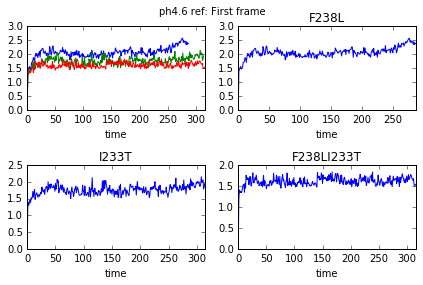

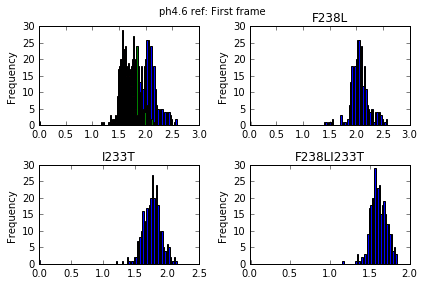

In [69]:
plotrmsd(rmsd_4NPQ_F238L,rmsd_4NPQ_I233T,rmsd_4NPQ_F238LI233T,note='ref: First frame')
plotrmsdhist(rmsd_4NPQ_F238L,rmsd_4NPQ_I233T,rmsd_4NPQ_F238LI233T,note='ref: First frame')

## Ref: 4NPQ_1 XRD

In [55]:
rmsd_4NPQ_BA1_F238L_ref_4NPQxrd = rmsd_dataframe("F238L","4NPQ")
rmsd_4NPQ_BA1_I233T_ref_4NPQxrd = rmsd_dataframe("I233T","4NPQ")
rmsd_4NPQ_BA1_F238LI233T_ref_4NPQxrd = rmsd_dataframe("F238LI233T","4NPQ")

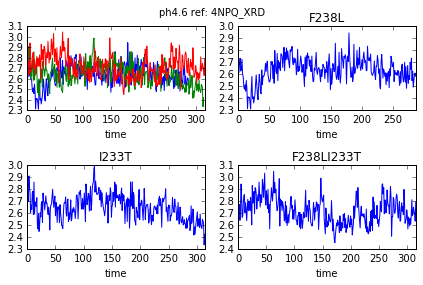

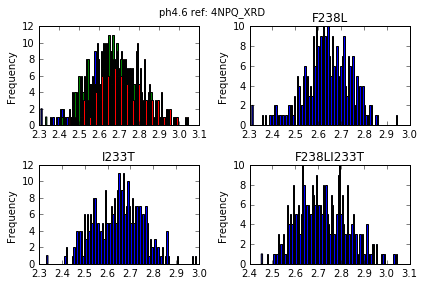

In [57]:
plotrmsd(rmsd_4NPQ_BA1_F238L_ref_4NPQxrd,rmsd_4NPQ_BA1_I233T_ref_4NPQxrd,rmsd_4NPQ_BA1_F238LI233T_ref_4NPQxrd,note='ref: 4NPQ_XRD')
plotrmsdhist(rmsd_4NPQ_BA1_F238L_ref_4NPQxrd,rmsd_4NPQ_BA1_I233T_ref_4NPQxrd,rmsd_4NPQ_BA1_F238LI233T_ref_4NPQxrd,note='ref: 4NPQ_XRD')

## Ref: 4HFI_1 XRD

In [58]:
rmsd_4NPQ_BA1_F238L_ref_4HFIxrd = rmsd_dataframe("F238L","4HFI")
rmsd_4NPQ_BA1_I233T_ref_4HFIxrd = rmsd_dataframe("I233T","4HFI")
rmsd_4NPQ_BA1_F238LI233T_ref_4HFIxrd = rmsd_dataframe("F238LI233T","4HFI")

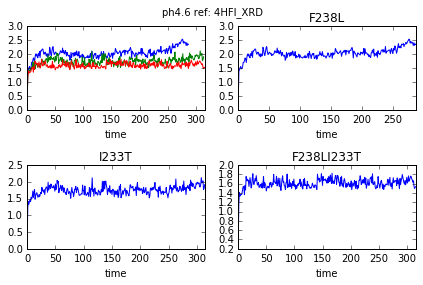

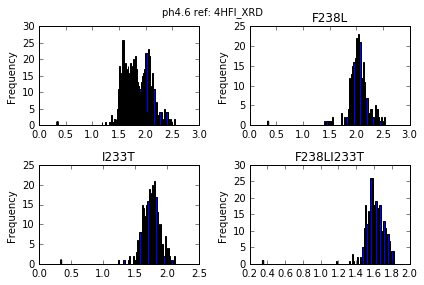

In [59]:
plotrmsd(rmsd_4NPQ_BA1_F238L_ref_4HFIxrd,rmsd_4NPQ_BA1_I233T_ref_4HFIxrd,rmsd_4NPQ_BA1_F238LI233T_ref_4HFIxrd,note='ref: 4HFI_XRD')
plotrmsdhist(rmsd_4NPQ_BA1_F238L_ref_4HFIxrd,rmsd_4NPQ_BA1_I233T_ref_4HFIxrd,rmsd_4NPQ_BA1_F238LI233T_ref_4HFIxrd,note='ref: 4HFI_XRD')

## Some Comparisons

## Partical RMSD

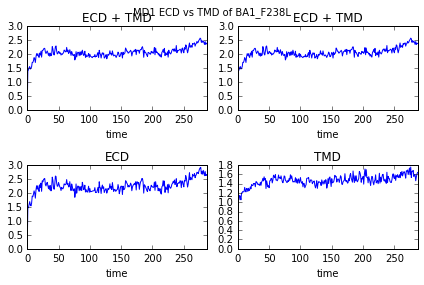

In [62]:
rmsd_ecd_4NPQ_BA1_F238L = rmsd_ecd_dataframe("F238L","self")
rmsd_tmd_4NPQ_BA1_F238L = rmsd_tmd_dataframe("F238L","self")
fig, axes = plt.subplots(nrows=2, ncols=2)
rmsd_4NPQ_F238L.plot(x='time', y='RMSD', ax=axes[0,0],legend=False,title="ECD + TMD")
rmsd_4NPQ_F238L.plot(x='time', y='RMSD', ax=axes[0,1],legend=False,title="ECD + TMD")
rmsd_ecd_4NPQ_BA1_F238L.plot(x='time', y='RMSD', ax=axes[1,0],legend=False,title="ECD")
rmsd_tmd_4NPQ_BA1_F238L.plot(x='time', y='RMSD', ax=axes[1,1],legend=False,title="TMD")
fig.suptitle('MD1 ' + 'ECD vs TMD of BA1_F238L')
fig.tight_layout()

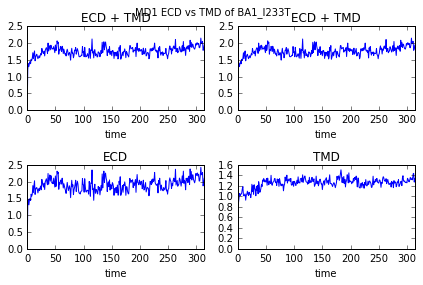

In [64]:
rmsd_ecd_4NPQ_BA1_I233T = rmsd_ecd_dataframe("I233T","self")
rmsd_tmd_4NPQ_BA1_I233T = rmsd_tmd_dataframe("I233T","self")
fig, axes = plt.subplots(nrows=2, ncols=2)
rmsd_4NPQ_I233T.plot(x='time', y='RMSD', ax=axes[0,0],legend=False,title="ECD + TMD")
rmsd_4NPQ_I233T.plot(x='time', y='RMSD', ax=axes[0,1],legend=False,title="ECD + TMD")
rmsd_ecd_4NPQ_BA1_I233T.plot(x='time', y='RMSD', ax=axes[1,0],legend=False,title="ECD")
rmsd_tmd_4NPQ_BA1_I233T.plot(x='time', y='RMSD', ax=axes[1,1],legend=False,title="TMD")
fig.suptitle('MD1 ' + 'ECD vs TMD of BA1_I233T')
fig.tight_layout()

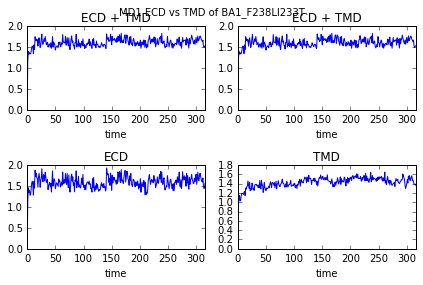

In [66]:
rmsd_ecd_4NPQ_BA1_F238LI233T = rmsd_ecd_dataframe("F238LI233T","self")
rmsd_tmd_4NPQ_BA1_F238LI233T = rmsd_tmd_dataframe("F238LI233T","self")
fig, axes = plt.subplots(nrows=2, ncols=2)
rmsd_4NPQ_F238LI233T.plot(x='time', y='RMSD', ax=axes[0,0],legend=False,title="ECD + TMD")
rmsd_4NPQ_F238LI233T.plot(x='time', y='RMSD', ax=axes[0,1],legend=False,title="ECD + TMD")
rmsd_ecd_4NPQ_BA1_F238LI233T.plot(x='time', y='RMSD', ax=axes[1,0],legend=False,title="ECD")
rmsd_tmd_4NPQ_BA1_F238LI233T.plot(x='time', y='RMSD', ax=axes[1,1],legend=False,title="TMD")
fig.suptitle('MD1 ' + 'ECD vs TMD of BA1_F238LI233T')
fig.tight_layout()